In [1]:
#1

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data & Combine the data inot a single dataset
df1 = pd.read_csv("data/clinicaltrial_data.csv")
df2 = pd.read_csv("data/mouse_drug_data.csv")

# Display the data table
df_merged = pd.merge(df1, df2, on="Mouse ID", how="left")
df_merged.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [2]:
#Has df_merged changed from above?
df_merged.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug'],
      dtype='object')

In [3]:
df_merged.index
#no, index and column are still the same.

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905],
           dtype='int64', length=1906)

In [4]:
#2 # Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#df_mtvd = df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()   !!!!!!!!!
df_mtvd = df_merged.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()

# Convert to DataFrame
df_mtvd = pd.DataFrame(df_mtvd)

#Flatten the column headings 
df_mtvd = df_mtvd.reset_index()

# Preview DataFrame
df_mtvd

,index,Drug,Timepoint,Tumor Volume (mm3)
0,0,Capomulin,0,45.000000
1,1,Capomulin,5,44.266086
2,2,Capomulin,10,43.084291
3,3,Capomulin,15,42.064317
4,4,Capomulin,20,40.716325
5,5,Capomulin,25,39.939528
6,6,Capomulin,30,38.769339
7,7,Capomulin,35,37.816839
8,8,Capomulin,40,36.958001
9,9,Capomulin,45,36.236114


In [5]:
#3
#Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#df = df_merged

#Convert to DataFrame
df_setv = df_merged.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem().reset_index()

#Preview DataFrame
df_setv.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:



#First the mean

df_mtvd = df_mtvd.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
#Next the st error

df_setv= df_setv.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]




#I kept it simple with no new names


In [27]:
df_mtvd

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [7]:
#4
#### I commented this out   !!!!
'''df = df_merged
df_mtvd = df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()
df_merged = pd.merge(df1, df2, on="Mouse ID", how="left")

# Minor Data Munging to Re-Format the Data Frames
re_format_df_setv = pd.pivot_table(df_merged, values='Tumor Volume (mm3)', index=['Timepoint'], columns=['Drug'])
df_mtvd = df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()
df_mtvd = df_mtvd.reset_index()

# Preview that Reformatting worked
re_format_df_setv.head()'''



# Minor Data Munging to Re-Format the Data Frames
#tumor_vols_mean = tumor_vols_mean.reset_index()
#tumor_vols_pivot_mean = tumor_vols_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

#tumor_vols_sem = tumor_vols_sem.reset_index()
#tumor_vols_pivot_sem = tumor_vols_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
#tumor_vols_pivot_mean.head()













'df = df_merged\ndf_mtvd = df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()\ndf_merged = pd.merge(df1, df2, on="Mouse ID", how="left")\n\n# Minor Data Munging to Re-Format the Data Frames\nre_format_df_setv = pd.pivot_table(df_merged, values=\'Tumor Volume (mm3)\', index=[\'Timepoint\'], columns=[\'Drug\'])\ndf_mtvd = df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()\ndf_mtvd = df_mtvd.reset_index()\n\n# Preview that Reformatting worked\nre_format_df_setv.head()'

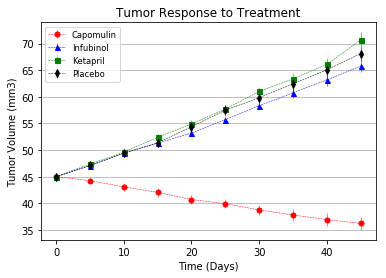

In [8]:
#5
df = df_merged
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import random as rd
%matplotlib inline


#### I commented this out   !!!!
'''df = df_merged
df_mtvd = df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()
df_merged = pd.merge(df1, df2, on="Mouse ID", how="left")

re_format_df_setv = pd.pivot_table(df_merged, values='Tumor Volume (mm3)', index=['Timepoint'], columns=['Drug'])
df_mtvd = df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().reset_index()
df_mtvd = df_mtvd.reset_index()'''


# Generate the Plot (with Error Bars)
plt.errorbar(df_mtvd.index, df_mtvd["Capomulin"], yerr=df_setv["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(df_mtvd.index, df_mtvd["Infubinol"], yerr=df_setv["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(df_mtvd.index, df_mtvd["Ketapril"], yerr=df_setv["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(df_mtvd.index, df_mtvd["Placebo"], yerr=df_setv["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small", fancybox=True)

# Save the Figure
#####plt.savefig("analysis/Fig1.png")

# Show the Figure
plt.show()



In [9]:
#6 # Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Preview DataFrame


# Convert to DataFrame
'''df = df_merged
df_mrt = df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean().reset_index()
df_mrt.head()'''

# changed the name to include met for metastatic. Same results just easier name to remember
df_met_mean = df_merged.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean().reset_index()
df_met_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
#7 #Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
'''df = df_merged
new_sem_tv = df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem().reset_index()
#Convert to DataFrame
#Preview DataFrame
new_sem_tv.head()'''

#Same as above just changed to easier name.
df_met_sem = df_merged.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem().reset_index()
df_met_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
#8 #Minor Data Munging to Re-format the DataFrames

'''re_format_df_setv = pd.pivot_table(df_merged, values='Metastatic Sites', index=['Timepoint'], columns=['Drug'])
df_mtvd = df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean().reset_index()
df_mtvd = df_mtvd.reset_index()
# Preview that Reformatting worked

re_format_df_setv.head()'''


#You already reset index above.
df_met_mean_pivot = pd.pivot_table(df_met_mean, values='Metastatic Sites', index=['Timepoint'], columns=['Drug'])
df_met_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
df_met_sem_pivot = pd.pivot_table(df_met_sem, values='Metastatic Sites', index=['Timepoint'], columns=['Drug'])
df_met_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


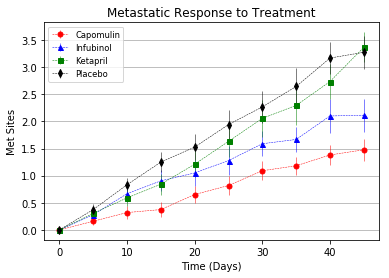

In [23]:
#9 # Generate the Plot (with Error Bars)

# Show the Figure

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import random as rd
%matplotlib inline

#df_mstd = pd.pivot_table(new_sem_tv, values='Metastatic Sites', index=['Timepoint'], columns=['Drug'])
# I commented this out
"plt.plot(df_mstd)"

# This code is similar to above graph but with Metastatic values instead of tumor volume values.
plt.errorbar(df_met_mean_pivot.index, df_met_mean_pivot["Capomulin"], yerr=df_met_sem_pivot["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(df_met_mean_pivot.index, df_met_mean_pivot["Infubinol"], yerr=df_met_sem_pivot["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(df_met_mean_pivot.index, df_met_mean_pivot["Ketapril"], yerr=df_met_sem_pivot["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(df_met_mean_pivot.index, df_met_mean_pivot["Placebo"], yerr=df_met_sem_pivot["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Response to Treatment")
plt.ylabel("Met Sites")
plt.xlabel("Time (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small", fancybox=True)




#x = "Treatment Duration (Days)"
#y = "Met. Sites"
plt.show()

#plt.legend([df_mstd])
#plt.xlabel('Treatment Duration Days')
#plt.ylable('Met. Sites')

In [14]:
df_merged.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug'],
      dtype='object')

In [15]:
df_merged.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905],
           dtype='int64', length=1906)

In [16]:
#10 # Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

#df_mouse_count = df_merged.nunique()
survival_count = df_merged.groupby(["Drug","Timepoint"]).count()["Metastatic Sites"]
# Convert to DataFrame
# Preview DataFrame
survival_count = pd.DataFrame({"Mouse Count":survival_count})
survival_count.head().reset_index()

#to save reset_index changes
survival_count = survival_count.reset_index()

In [17]:
survival_count.columns

Index(['Drug', 'Timepoint', 'Mouse Count'], dtype='object')

In [18]:
survival_count.index

RangeIndex(start=0, stop=100, step=1)

In [19]:
#I added the pivot tabale
survival_count_pivot = survival_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]


In [21]:
#11 Minor Data Munging to Re-format the Data Frames
#Preview the Data Frame

# Minor Data Munging to Re-Format the Data Frames
#tumor_vols_mean = tumor_vols_mean.reset_index()
#tumor_vols_pivot_mean = tumor_vols_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

#tumor_vols_sem = tumor_vols_sem.reset_index()
'''tumor_vols_pivot_sem = tumor_vols_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
percent_change_drug =  100 * (re_format_df_setv.iloc[-1] - re_format_df_setv.iloc[0]) / re_format_df_setv.iloc[0]


data_reformat_percentage_change = df_mtvd(percent_change_drug, values='Tumor Volume (mm3)', index=['Timepoint'], columns=['Drug'])

# Preview that Reformatting worked
data_reformat_percentage_change.head()'''








'tumor_vols_pivot_sem = tumor_vols_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]\npercent_change_drug =  100 * (re_format_df_setv.iloc[-1] - re_format_df_setv.iloc[0]) / re_format_df_setv.iloc[0]\n\n\ndata_reformat_percentage_change = df_mtvd(percent_change_drug, values=\'Tumor Volume (mm3)\', index=[\'Timepoint\'], columns=[\'Drug\'])\n\n# Preview that Reformatting worked\ndata_reformat_percentage_change.head()'

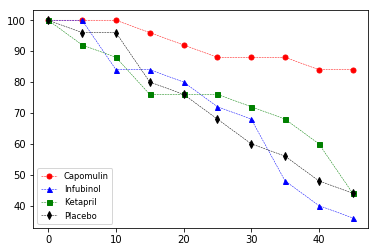

<function matplotlib.pyplot.show>

In [22]:
#12 #Generate the Plot (Accounting for percentages)

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import random as rd
%matplotlib inline




# This code is similar to above but suvival count table
plt.errorbar(survival_count_pivot.index, 100*survival_count_pivot["Capomulin"]/25, color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(survival_count_pivot.index, 100*survival_count_pivot["Infubinol"]/25, color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(survival_count_pivot.index, 100*survival_count_pivot["Ketapril"]/25, color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(survival_count_pivot.index, 100 *survival_count_pivot["Placebo"]/25, color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)



plt.legend(loc="best", fontsize="small", fancybox=True)

#x = "Treatment Duration (Days)"
#y = "Met. Sites"
plt.show()




plt.show

In [20]:
#11 Calculate the percent changes for each drug
#percent_change_drug =  100 * (re_format_df_setv.iloc[-1] - re_format_df_setv.iloc[0]) / re_format_df_setv.iloc[0]
# Display the data to confirm
#percent_change_drug

#Below I devided by 25 and multiplied by 100 to get the percentage.




In [29]:
#13 #Calculate the percentages changes for each drug

#from the tumor volumes pivot table, 
#you want to grab the last value for each drug and the first value for each drug (hint: use iloc[0] and iloc[-1])

#the formula for percent change is [last value] - [first value] / [first value]
'''pd.pivot_table(df_merged, values='Tumor Volume (mm3)', index=['Timepoint'], columns=['Drug'])
df_percentage_change = pd.pivot_table(df_merged, values['Capomulin'].iloc[0]'''


tumor_pct_change =  100 * (df_mtvd.iloc[-1] - df_mtvd.iloc[0]) / df_mtvd.iloc[0]
#tumor_pct_change_sem =  100 * (tumor_vols_pivot_sem.iloc[-1] - tumor_vols_pivot_sem.iloc[0]) / tumor_vols_pivot_sem.iloc[0]

# Display the data to confirm
tumor_pct_change.head()


#Display the data to confirm

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
dtype: float64

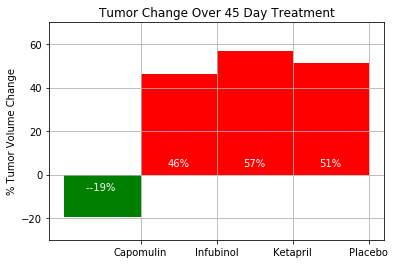

In [31]:
#14 #Store all Relevant Percentage Changes into a Tuple
#Splice the data between passing and failing drugs
#Orient widths. Add lables, tick marks, etc.
#Use functions to label the percentage of changes
#Call functions to implement the functions calls
#Save the figure

# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_change["Capomulin"], 
               tumor_pct_change["Infubinol"], 
               tumor_pct_change["Ketapril"], 
               tumor_pct_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("analysis/Fig4.png")

# Show the Figure


fig.show()